# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.    
● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.       
● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.
Help the company to carry out their study with the help of data provided.


In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Sales_add.csv')
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
df.shape

(22, 5)

In [4]:
df.isna().any()

Month                             False
Region                            False
Manager                           False
Sales_before_digital_add(in $)    False
Sales_After_digital_add(in $)     False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

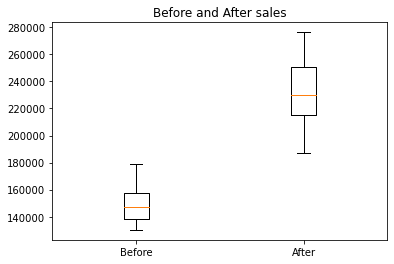

<Figure size 432x288 with 0 Axes>

In [7]:
plt.boxplot(df[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']],labels=('Before','After'))
plt.title('Before and After sales')
plt.show()
plt.tight_layout()

it can be seen from the graph that there is a difference in total sales before and after digital marketing

# one tailed T test

In [8]:
#set the hypothesis
# Null Hypothesis,H0:there isn't an increase in sales stepping into digital marketing
#Alternate Hypothesis,Ha:there is an increase in sales stepping into digital marketing

In [9]:
# import ttest module
from scipy.stats import ttest_ind

In [10]:
alpha=0.05
Sales_before_digital=df['Sales_before_digital_add(in $)']
Sales_After_digital=df['Sales_After_digital_add(in $)']

In [11]:
_,p=ttest_ind(Sales_before_digital,Sales_After_digital)
print('p value:',p)
if p> alpha:
    print ('Fail to reject the Null Hypothesis,H0')
else:
    print('Reject the Null Hypothesis,H0')

p value: 2.614368006904645e-16
Reject the Null Hypothesis,H0


we can conclude that there is an increase in sales stepping into digital marketing

# The company needs to check whether there is any dependency between the features “Region” and “Manager”.  

In [12]:
df['Region'].value_counts()

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

In [13]:
df.describe(include=object)

,Month,Region,Manager
count,22,22,22
unique,22,3,3
top,Month-1,Region - A,Manager - A
freq,1,10,9


In [14]:
df.groupby(['Region','Manager']).describe()

Sales_before_digital_add(in $)                 \
                                                count           mean   
Region     Manager                                                     
Region - A Manager - A                            4.0  148628.500000   
           Manager - B                            3.0  155617.000000   
           Manager - C                            3.0  140228.000000   
Region - B Manager - A                            4.0  142725.000000   
           Manager - B                            1.0  152167.000000   
           Manager - C                            2.0  165299.000000   
Region - C Manager - A                            1.0  147463.000000   
           Manager - B                            3.0  156492.333333   
           Manager - C                            1.0  130625.000000   

                                                                     \
                                 std       min        25%       50%   
Region     Manager                                                    
Region - A Manager - A  22208.299567  131140.0  132475.75  142217.5   
           Manager - B  20198.014457  137163.0  144828.00  152493.0   
           Manager - C   9663.610661  130263.0  135562.50  140862.0   
Region - B Manager - A   7125.622265  132135.0  141830.25  145670.0   
           Manager - B           NaN  152167.0  152167.00  152167.0   
           Manager - C   8428.712832  159339.0  162319.00  165299.0   
Region - C Manager - A           NaN  147463.0  147463.00  147463.0   
           Manager - B  13282.251328  141956.0  150740.50  159525.0   
           Manager - C           NaN  130625.0  130625.00  130625.0   

                                            Sales_After_digital_add(in $)  \
                              75%       max                         count   
Region     Manager                                                          
Region - A Manager - A  158370.25  178939.0                           4.0   
           Manager - B  164844.00  177195.0                           3.0   
           Manager - C  145210.50  149559.0                           3.0   
Region - B Manager - A  146564.75  147425.0                           4.0   
           Manager - B  152167.00  152167.0                           1.0   
           Manager - C  168279.00  171259.0                           2.0   
Region - C Manager - A  147463.00  147463.0                           1.0   
           Manager - B  163760.50  167996.0                           3.0   
           Manager - C  130625.00  130625.0                           1.0   

                                                                         \
                                 mean           std       min       25%   
Region     Manager                                                        
Region - A Manager - A  257609.250000  20489.543095  230637.0  247507.5   
           Manager - B  218944.000000  35255.095816  187305.0  199942.0   
           Manager - C  233754.000000   9893.605814  223334.0  229121.0   
Region - B Manager - A  234962.750000  24791.800007  205180.0  221575.0   
           Manager - B  231808.000000           NaN  231808.0  231808.0   
           Manager - C  214718.000000  16324.267150  203175.0  208946.5   
Region - C Manager - A  229336.000000           NaN  229336.0  229336.0   
           Manager - B  214551.333333  37991.980816  191517.0  192626.0   
           Manager - C  222106.000000           NaN  222106.0  222106.0   

                                                       
                             50%        75%       max  
Region     Manager                                     
Region - A Manager - A  261760.5  271862.25  276279.0  
           Manager - B  212579.0  234763.50  256948.0  
           Manager - C  234908.0  238964.00  243020.0  
Region - B Manager - A  235641.5  249029.25  263388.0  
           Manager - B  231808.0  231808.00  231808.0  
           Manager - C  214718.

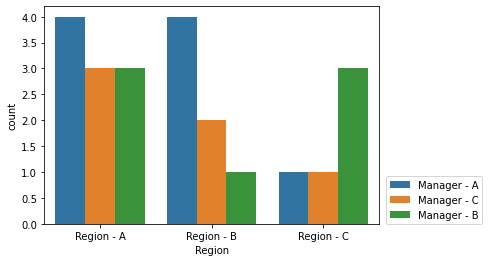

In [15]:
sns.countplot(data=df,x='Region',hue='Manager')
plt.legend(loc=(1.02,0))

from the dataset it is clear that Managers A B and C has worked for all three regions for different months also it was chosen random

# Chi Square Test for independence 

In [16]:
#set the hypothesis
# Null Hypothesis,H0:there is no dependency between the features “Region” and “Manager”.
#Alternate Hypothesis,Ha: there is dependency between the features “Region” and “Manager”.

In [17]:
#import chi square module
from scipy.stats import chi2_contingency

In [18]:
#find contingency table
table=pd.crosstab(df['Region'],df['Manager'])
table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [19]:
alpha=0.05

In [20]:
stat,p,dof,expected=chi2_contingency(table)
print('p value:',p)
if p> alpha:
    print ('fail to reject the Null Hypothesis,H0')
else:
    print('Reject the Null Hypothesis,H0')

p value: 0.5493991051158094
fail to reject the Null Hypothesis,H0


so we can conclude that there is no dependency between Region and Manager